## Lapser Campaign Analysis
- around 1.2 cr customers have not shopped for last four months
- a large scale sms campaign was launched to bring them back to stores
- there were print, TVC campaigns running parallely, which could also have their impact
- this study is trying to find any patterns in the result

### Questions to find answers to
- How many customers came to shop?
- Which cohort saw higher conversion?
- Which markets saw higher/ lower conversion?

In [2]:
# importing the necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# uploading the dataset to analyse
df=pd.read_excel('4 wk dataset.xlsx')
df.head()

,Zone,City,Market,Feeder Town,Location,Competition Index,D-Mart,Food Competition,Fashion Competition,Store,...,FP Infrequent Target Base,FP Infrequent count,Non FP Target Base,Non FP count,FP Dormant Target Base,FP Dormant count,O2O Target Base,O2O count,Non FP Dormant Target Base,Non FP Dormant count
0,EAST,DIBRUGARH,Smaller towns,Feeder Town,STAND-ALONE,Low,No,0.0,4.0,BB-DIBRUGARH-A.T.ROAD,...,1073,65.0,1456,81.0,8316,192.0,4403,80.0,8653,109.0
1,EAST,GUWAHATI,Mini Metro,Feeder Town,STAND-ALONE,High,No,2.0,7.0,BB-GUWAHATI-CITY SQUARE,...,3244,225.0,9085,660.0,28660,620.0,39697,744.0,59771,552.0
2,EAST,JORHAT,Smaller towns,Feeder Town,STAND-ALONE,Low,No,0.0,3.0,BB-JORHAT-MOUZA-NAGARMHAL-PATT,...,1244,126.0,3171,328.0,7745,257.0,5549,177.0,11216,173.0
3,EAST,SILCHAR,Smaller towns,Feeder Town,MALL BASED,Very Low,No,0.0,2.0,BB-SILCHAR-GOLDIGHI COMPLEX-DI,...,1285,133.0,4761,519.0,7300,262.0,6250,194.0,13048,195.0
4,EAST,BIHAR SHARIF,Smaller towns,NaN,STAND-ALONE,Very Low,No,0.0,2.0,BB-BIHARSHARIF-NAGESHWAR MALL,...,2932,270.0,1252,101.0,19161,567.0,2964,76.0,5608,71.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        285 non-null    object 
 1   City                        285 non-null    object 
 2   Market                      285 non-null    object 
 3   Feeder Town                 75 non-null     object 
 4   Location                    285 non-null    object 
 5   Competition Index           278 non-null    object 
 6   D-Mart                      278 non-null    object 
 7   Food Competition            278 non-null    float64
 8   Fashion Competition         278 non-null    float64
 9   Store                       285 non-null    object 
 10  Total Target Base           285 non-null    int64  
 11  Total count                 285 non-null    int64  
 12  Current Bills               285 non-null    float64
 13  pre #shopagain Bills        285 non

In [6]:
# where are the null values?
df.isnull().sum()

Zone                            0
City                            0
Market                          0
Feeder Town                   210
Location                        0
Competition Index               7
D-Mart                          7
Food Competition                7
Fashion Competition             7
Store                           0
Total Target Base               0
Total count                     0
Current Bills                   0
pre #shopagain Bills            0
pre-Covid Bills                 0
FP Regular Target Base          0
FP Regular count                1
FP Fashion Target Base          0
FP Fashion count                1
FP Infrequent Target Base       0
FP Infrequent count             1
Non FP Target Base              0
Non FP count                    1
FP Dormant Target Base          0
FP Dormant count                1
O2O Target Base                 0
O2O count                       1
Non FP Dormant Target Base      0
Non FP Dormant count            1
dtype: int64

In [7]:
# only one field has null values. Updating those null values with relevant label.
df['Feeder Town'].fillna('Not Feeder Town', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        285 non-null    object 
 1   City                        285 non-null    object 
 2   Market                      285 non-null    object 
 3   Feeder Town                 285 non-null    object 
 4   Location                    285 non-null    object 
 5   Competition Index           278 non-null    object 
 6   D-Mart                      278 non-null    object 
 7   Food Competition            278 non-null    float64
 8   Fashion Competition         278 non-null    float64
 9   Store                       285 non-null    object 
 10  Total Target Base           285 non-null    int64  
 11  Total count                 285 non-null    int64  
 12  Current Bills               285 non-null    float64
 13  pre #shopagain Bills        285 non

In [8]:
df.describe()

,Food Competition,Fashion Competition,Total Target Base,Total count,Current Bills,pre #shopagain Bills,pre-Covid Bills,FP Regular Target Base,FP Regular count,FP Fashion Target Base,...,FP Infrequent Target Base,FP Infrequent count,Non FP Target Base,Non FP count,FP Dormant Target Base,FP Dormant count,O2O Target Base,O2O count,Non FP Dormant Target Base,Non FP Dormant count
count,278.000000,278.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,284.000000,285.000000,...,285.000000,284.000000,285.000000,284.000000,285.000000,284.000000,285.000000,284.000000,285.000000,284.000000
mean,1.651079,3.748201,40937.775439,1448.382456,3243.571930,3042.759649,6926.962034,2600.508772,324.809859,2937.333333,...,1982.877193,128.443662,2383.350877,181.573944,14638.364912,311.538732,6372.456140,144.299296,10022.884211,124.338028
std,1.408016,1.792860,21049.200623,727.736819,1487.592998,1492.043111,3090.577710,1263.471878,167.345580,1617.776832,...,954.803919,68.888605,1534.651946,130.085042,7347.588065,158.097910,4430.963613,97.571783,6660.542778,77.558266
min,0.000000,0.000000,828.000000,0.000000,0.000000,0.000000,603.812953,10.000000,0.000000,12.000000,...,16.000000,0.000000,38.000000,0.000000,385.000000,2.000000,46.000000,0.000000,52.000000,0.000000
25%,1.000000,2.000000,26295.000000,922.000000,2177.750000,1949.500000,4736.745584,1750.000000,194.750000,1797.000000,...,1368.000000,79.000000,1354.000000,90.750000,9684.000000,196.750000,3202.000000,76.000000,5604.000000,71.750000
50%,1.000000,4.000000,37445.000000,1293.000000,2907.250000,2714.500000,6327.961486,2444.000000,310.000000,2686.000000,...,1825.000000,114.500000,2066.000000,145.000000,13189.000000,279.500000,5368.000000,120.000000,8725.000000,106.000000
75%,2.000000,5.000000,52985.000000,1876.000000,3979.750000,3811.000000,8452.175674,3338.000000,423.750000,4015.000000,...,2537.000000,159.000000,2944.000000,226.500000,18654.000000,393.250000,8368.000000,186.750000,12919.000000,158.000000
max,7.000000,8.000000,152663.000000,4265.000000,8139.250000,8490.500000,20963.173141,7118.000000,887.000000,9963.000000,...,5706.000000,332.000000,9085.000000,726.000000,46207.000000,959.000000,39697.000000,744.000000,59771.000000,552.000000


In [9]:
df['Total Target Base'].sum()

11667266

## Targeting 117 lakhs customers
- Each store has around 37k customers to target
- The larger stores (top 25%) had 53k customers
- The top store had 1.5 lakhs customers to target

In [10]:
df['Total count'].sum()

412789

## 4.1 lakhs customers came to shop with us
- on an average, 1300 customers for a store
- max turn out was 4265 customers in a store

## Conversion rate across different cohorts

In [11]:
df['FP Regular conversion']=(df['FP Regular count']/df['FP Regular Target Base'])*100
df['FP Fashion conversion']=(df['FP Fashion count']/df['FP Fashion Target Base'])*100
df['FP Infrequent conversion']=(df['FP Infrequent count']/df['FP Infrequent Target Base'])*100
df['Non FP conversion']=(df['Non FP count']/df['Non FP Target Base'])*100
df['FP Dormant conversion']=(df['FP Dormant count']/df['FP Dormant Target Base'])*100
df['O2O conversion']=(df['O2O count']/df['O2O Target Base'])*100
df['Non FP Dormant conversion']=(df['Non FP Dormant count']/df['Non FP Dormant Target Base'])*100

In [12]:
print('FP Regular conversion: ',df['FP Regular conversion'].median())
print('FP Fashion conversion: ',df['FP Fashion conversion'].median())
print('FP Infrequent conversion: ',df['FP Infrequent conversion'].median())
print('Non FP conversion: ',df['Non FP conversion'].median())
print('FP Dormant conversion: ',df['FP Dormant conversion'].median())
print('O2O conversion: ',df['O2O conversion'].median())
print('Non FP Dormant conversion: ',df['Non FP Dormant conversion'].median())

FP Regular conversion:  12.367696812330056
FP Fashion conversion:  8.14591187051303
FP Infrequent conversion:  6.2642608413494685
Non FP conversion:  7.397922779436232
FP Dormant conversion:  2.092916999500005
O2O conversion:  2.257154739933976
Non FP Dormant conversion:  1.2602570137652056


### Cohort wise conversion
- FP Regulars saw 12% conversion, which is the highest
- FP Fashion, FP Infrequent, Non FP cohorts saw around 7% conversion
- FP Dormant, Non FP Dormant and O2O base saw less than 2% conversion

In [16]:
df['Regular conversion']=(df['FP Regular count']+df['FP Fashion count']+df['FP Infrequent count']+df['Non FP count'])/(df['FP Regular Target Base']+df['FP Fashion Target Base']+df['FP Infrequent Target Base']+df['Non FP Target Base'])

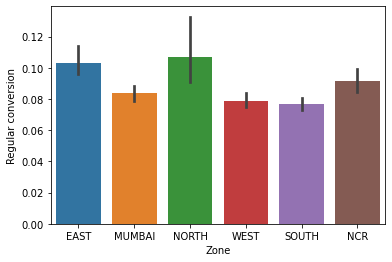

In [20]:
sns.barplot(x='Zone', y='Regular conversion', data=df)
plt.show()

In [19]:
df['Dormant conversion']=(df['FP Dormant count']+df['Non FP Dormant count']+df['O2O count'])/(df['FP Dormant Target Base']+df['Non FP Dormant Target Base']+df['O2O Target Base'])

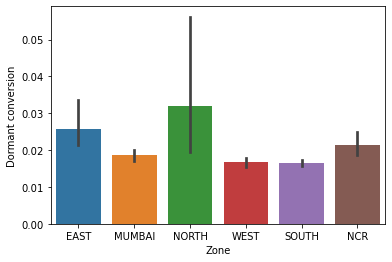

In [21]:
sns.barplot(x='Zone', y='Dormant conversion', data=df)
plt.show()

### Zone wise response
- East and North saw better response from regular customers
- South and West saw poorer response from regular customers
- North saw a better response from dormant customer base, followed by East

In [34]:
# finding the outlier stores in this case
outlier_regular=df.loc[(df['Regular conversion']>0.12) & (df['Regular conversion']<0.25)]
outlier_regular[['Store', 'Regular conversion']].head(10)

,Store,Regular conversion
2,BB-JORHAT-MOUZA-NAGARMHAL-PATT,0.121282
3,BB-SILCHAR-GOLDIGHI COMPLEX-DI,0.128537
5,BB-KODERMA-UJALA COMPLEX,0.140011
44,BB-JAJPUR-UTKAL CENTER POINT,0.129080
57,BB-DARJEELING-RINK MALL,0.126514
113,BB-NEW DELHI-PACIFIC MALL,0.131786
126,BB-NOIDA-GAUR CITY,0.129096
134,BB-BADDI-HOMELAND CITY MALL,0.138679
155,BB-FAIZABAD-DEVKALI ROAD,0.122134
208,BB-DARBHANGA-JHA COMPLEX,0.145998


In [36]:
outlier_dormant=df.loc[(df['Dormant conversion']>0.03) & (df['Dormant conversion']<0.15)]
outlier_dormant[['Store', 'Dormant conversion']].head(10)

,Store,Dormant conversion
5,BB-KODERMA-UJALA COMPLEX,0.038497
42,BB-BHUBANESWAR-SYMPHONY MALL,0.031405
44,BB-JAJPUR-UTKAL CENTER POINT,0.075733
113,BB-NEW DELHI-PACIFIC MALL,0.042619
126,BB-NOIDA-GAUR CITY,0.046586
132,BB-SONIPAT-TARANA ROAD,0.093373
155,BB-FAIZABAD-DEVKALI ROAD,0.034288
208,BB-DARBHANGA-JHA COMPLEX,0.042201
283,BB-HALDIA-CITY CENTER,0.030751


In [39]:
low_regular=df.loc[df['Regular conversion']<0.06]
low_regular[['Store', 'Regular conversion']].head(10)

,Store,Regular conversion
32,BB-NAGPUR-LAND MARK,0.057659
82,BB-AURANGABAD-PROZONE MALL,0.058518
99,BB-THANE-HIGH STREET MALL,0.050253
201,BB-BENGALURU-SOUL SPACE SPIRIT,0.049779
236,BB-HYDERABAD-MAHESHWARI,0.059902
240,BB-HYDERABAD-ABIDS-MAHESHWARI,0.059350
241,BB-HYDERABAD-MADHAPUR,0.055350
244,BB-HYDERABAD-PUNJAGUTTA-HPERCI,0.036059
245,BB-HYDERABAD-PUNJIGUTTA,0.008439
262,BB-LATUR-BABASAHEB PARANJAPE M,0.056314


In [43]:
low_dormant=df.loc[df['Dormant conversion']<0.015]
low_dormant[['Store', 'Dormant conversion']].head(10)

,Store,Dormant conversion
1,BB-GUWAHATI-CITY SQUARE,0.014954
14,BB-BHILAI-SURYA TREASURE ISLAN,0.014250
27,BB-RAJKOT-KALAWAD ROAD,0.014312
32,BB-NAGPUR-LAND MARK,0.009514
33,BB-NAGPUR-EMPRESS CITY,0.008529
34,BB-NAGPUR-VIPL IT PARK,0.010496
35,BB-NAGPUR-MANISH NAGAR,0.011999
82,BB-AURANGABAD-PROZONE MALL,0.011872
96,BB-NEW-MUMBAI-VASHI-RAGHULEELA,0.011141
97,BB-THANE-VIVA CITY MALL,0.013112


### exception stores
- Darbhanga, Faizabad, Jorhat, Silchar, Koderma, Delhi Pacific Mall, Noida Gaur City saw better response from customers
- Hyderabad stores have seen poorer response from their regular base
- Guwahati, Rajkot, Bhilai, Thane saw poorer response from their dormant base
- Nagpur, Aurangabad were impacted due to lockdowns

## Other patterns across markets

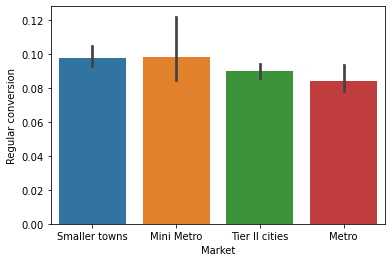

In [45]:
sns.barplot(x='Market', y='Regular conversion', data=df)
plt.show()

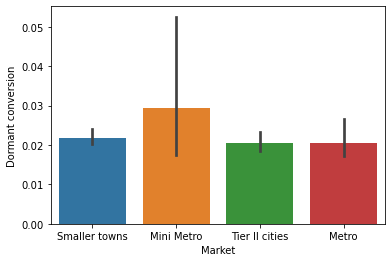

In [46]:
sns.barplot(x='Market', y='Dormant conversion', data=df)
plt.show()

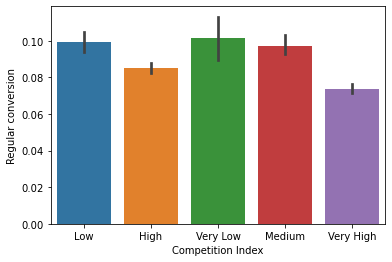

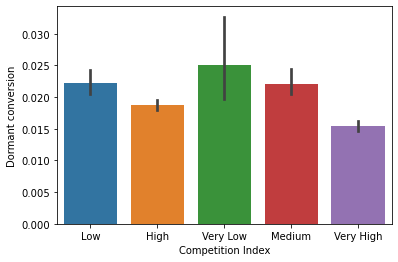

In [50]:
sns.barplot(x='Competition Index', y='Regular conversion', data=df)
plt.show()
sns.barplot(x='Competition Index', y='Dormant conversion', data=df)
plt.show()

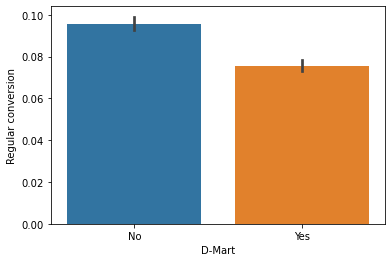

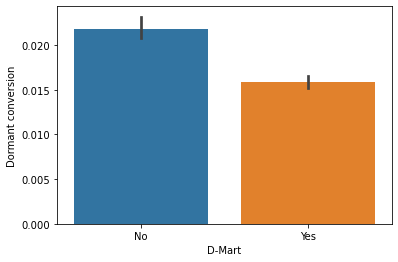

In [52]:
sns.barplot(x='D-Mart', y='Regular conversion', data=df)
plt.show()
sns.barplot(x='D-Mart', y='Dormant conversion', data=df)
plt.show()

## Inference
- Small town stores have seen better response; metro stores have seen poorer response
- Competitive markets have struggled to bring back customers
- Lot of Dormant customers have shifted to D-Mart